In [1]:
import numpy as nm
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import xgboost as xgb
import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
labels= pd.read_csv("../train_labels.csv")
labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [3]:

final_data=pd.DataFrame()
data= pd.read_csv('../train_data.csv',nrows=1000000)
data["S_2"]=pd.to_datetime(data["S_2"])
data["Year-Month"] = data["S_2"].dt.to_period('M')
data1=data.groupby('customer_ID').apply(lambda x: x.sample(n=1)).reset_index(drop = True)
final_data=pd.concat([final_data,pd.merge(labels,data1, how= 'inner', on='customer_ID')])



final_data.to_csv("Final_data-Step3.csv")




In [4]:
data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Year-Month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-04
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-05
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-06
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2017-12-01,0.444918,0.214272,0.509806,0.024078,0.001514,0.386644,0.001295,0.920215,...,NaN,NaN,0.000700,0.004486,0.006241,NaN,0.001294,0.006138,0.004346,2017-12
999996,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-01-01,0.445380,0.182068,0.511427,0.025369,0.008337,0.372405,0.002628,0.933117,...,NaN,NaN,0.007064,0.005506,0.005020,NaN,0.006667,0.004177,0.004452,2018-01
999997,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-02-28,0.439738,0.155119,0.497809,0.023311,0.000641,0.389353,0.009791,0.917929,...,NaN,NaN,0.002184,0.004863,0.007474,NaN,0.004654,0.005166,0.000017,2018-02
999998,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-03-31,0.449821,0.155417,0.501278,0.025809,0.006869,0.367082,0.001196,0.926053,...,NaN,NaN,0.000752,0.004426,0.005118,NaN,0.002986,0.000797,0.006316,2018-03


In [5]:
new_Data= final_data[final_data["Year-Month"]=="2018-03"]
print(len(new_Data))
Default_rate = nm.mean(new_Data['target'])
print(Default_rate)

8539
0.2996838037240895


In [6]:
final_data.shape

(82975, 192)

In [7]:
nm.mean(final_data['target'])

0.260825549864417

In [8]:
dtypes=final_data.dtypes

dtypelist = list()

for col in dtypes.index:
    if dtypes[col] == 'object':
        dtypelist.append(col)
        
print(dtypelist)

# final_data['D_63'].value_counts()
# final_data['D_64'].value_counts()


['customer_ID', 'D_63', 'D_64']


In [9]:
size = final_data.size
size

15931200

In [10]:
#One hot encoding

one_hot = pd.get_dummies(final_data[['D_63', 'D_64']])

# Combine the one hot encoded data with the original dataframe
final_data = pd.concat([final_data, one_hot], axis=1)

# Drop the original categorical columns
final_data.drop(['D_63', 'D_64', 'customer_ID'], axis=1, inplace=True)

In [11]:

from sklearn.preprocessing import OrdinalEncoder
for col in['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_66','D_68']:
    col_dummies=pd.get_dummies(final_data[col],prefix=col)
    final_data=pd.concat([final_data,col_dummies],axis=1)
    final_data.drop(col,axis=1,inplace=True)


In [12]:
final_data.shape

(82975, 225)

In [13]:
# pd.set_option('display.max_columns',None)
# final_data.head()

In [14]:
final_data

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,1,0,0,0,0,0,0,0,0,1
1,0,2017-12-29,0.861109,0.302357,0.006711,0.819772,0.007966,0.139138,0.000728,0.005235,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-06-10,0.852514,0.006877,0.007627,0.819987,0.009290,NaN,0.003959,0.007532,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-05-29,0.581232,0.206867,0.279991,1.004374,0.001605,0.149216,0.008668,0.008219,...,1,0,0,0,0,0,0,0,0,1
4,0,2017-12-30,0.877417,0.001762,0.007947,0.810670,0.003196,NaN,0.009694,0.004701,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82970,1,2017-05-25,0.559848,0.003366,1.319337,0.039250,0.001657,0.240873,0.293558,0.494647,...,1,0,0,0,0,0,0,1,0,0
82971,1,2018-02-28,0.214494,0.007116,0.552728,0.014322,0.009547,0.552067,0.456125,1.024074,...,0,0,0,0,0,1,0,0,0,0
82972,0,2017-11-11,0.257381,0.009242,0.193778,0.165030,0.006112,1.226597,0.009048,0.184833,...,0,0,0,0,0,0,0,0,0,1
82973,1,2017-09-01,0.492951,0.215591,0.516628,0.023872,0.009294,0.490583,0.008054,0.885366,...,1,0,0,0,0,0,0,0,1,0


In [15]:
# dtypes=final_data.dtypes

# dtypelist1 = list()

# for col in dtypes.index:
#     if dtypes[col] == 'object':
#         dtypelist1.append(col)
        
# print(dtypelist1)

# final_data['D_64'].value_counts()

In [16]:
final_data.dtypes

final_data.replace('', nm.nan, inplace=True)


In [17]:
final_data.to_csv("XGBoost_Input_final.csv")

In [18]:
final_data.shape

(82975, 225)

In [19]:
value = final_data['D_42'][1]

print(value)

nan


In [20]:
final_data['Year-Month']

0        2017-10
1        2017-12
2        2017-06
3        2017-05
4        2017-12
          ...   
82970    2017-05
82971    2018-02
82972    2017-11
82973    2017-09
82974    2017-03
Name: Year-Month, Length: 82975, dtype: period[M]

In [21]:
#test-train-test split

train_start_date = '2017-05'
train_end_date = '2018-01'

# Define the start and end dates for the test 1 set
test_start_date = '2017-03'
test_end_date = '2017-04'

# Define the start and end dates for the test 2 setYear-Month
test1_start_date = '2018-02'
test1_end_date = '2018-03'

# Split the data into training and test sets
train_final_data = final_data[(final_data['Year-Month'] >= train_start_date) & (final_data['Year-Month'] <= train_end_date)]
test_final_data = final_data[(final_data['Year-Month'] >= test_start_date) & (final_data['Year-Month'] <= test_end_date)]
test2_final_data = final_data[(final_data['Year-Month'] >= test1_start_date) & (final_data['Year-Month'] <= test1_end_date) ]         

In [22]:
test_final_data['Year-Month'].max()

train_final_data.shape

(55826, 225)

In [23]:
test_final_data['Year-Month']

12       2017-03
39       2017-03
52       2017-03
54       2017-04
61       2017-04
          ...   
82957    2017-04
82961    2017-04
82965    2017-03
82966    2017-03
82974    2017-03
Name: Year-Month, Length: 11111, dtype: period[M]

In [24]:
test2_final_data['Year-Month']

9        2018-02
10       2018-03
17       2018-03
34       2018-02
35       2018-02
          ...   
82942    2018-03
82943    2018-03
82944    2018-02
82947    2018-02
82971    2018-02
Name: Year-Month, Length: 16038, dtype: period[M]

In [25]:
print(sum(train_final_data["target"])/(len(train_final_data["target"])))

0.25767563500877727


In [26]:
train_final_data.shape

train_final_data['target'].dtypes


dtype('int64')

In [27]:
lentrain=len(train_final_data)
DR1 = sum(train_final_data['target'])/lentrain
print(sum(train_final_data['target']))
print("Length of train:",lentrain)
print("Default Rate of train:",DR1)
print("shape: ",train_final_data.shape)

14385
Length of train: 55826
Default Rate of train: 0.25767563500877727
shape:  (55826, 225)


In [28]:
lentest=len(test_final_data)
DR2 = sum(test_final_data['target'])/lentest

print("Length of train:",lentest)
print("Default Rate of train:",DR2)
print(sum(test_final_data['target']))
print("shape: ",test_final_data.shape)


Length of train: 11111
Default Rate of train: 0.23697236972369723
2633
shape:  (11111, 225)


In [29]:
lentest1=len(test2_final_data)
DR3 = sum(test2_final_data['target'])/lentest1

print("Length of train:",lentest1)
print("Default Rate of train:",DR3)
print(sum(test2_final_data['target']))
print("Shape: ",test2_final_data.shape)

Length of train: 16038
Default Rate of train: 0.2883152512782142
4624
Shape:  (16038, 225)


In [30]:
display(train_final_data)

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,1,0,0,0,0,0,0,0,0,1
1,0,2017-12-29,0.861109,0.302357,0.006711,0.819772,0.007966,0.139138,0.000728,0.005235,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-06-10,0.852514,0.006877,0.007627,0.819987,0.009290,NaN,0.003959,0.007532,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-05-29,0.581232,0.206867,0.279991,1.004374,0.001605,0.149216,0.008668,0.008219,...,1,0,0,0,0,0,0,0,0,1
4,0,2017-12-30,0.877417,0.001762,0.007947,0.810670,0.003196,NaN,0.009694,0.004701,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82968,0,2017-12-14,0.920545,0.005075,0.003105,1.004365,0.003671,0.134844,0.007686,0.008194,...,1,0,0,0,0,0,0,0,0,1
82969,0,2017-09-28,1.007783,0.002555,0.007038,0.815799,0.002271,NaN,0.004929,0.006698,...,1,0,1,0,0,0,0,1,0,0
82970,1,2017-05-25,0.559848,0.003366,1.319337,0.039250,0.001657,0.240873,0.293558,0.494647,...,1,0,0,0,0,0,0,1,0,0
82972,0,2017-11-11,0.257381,0.009242,0.193778,0.165030,0.006112,1.226597,0.009048,0.184833,...,0,0,0,0,0,0,0,0,0,1


In [31]:

# Extract the input features and target variable from the training data
X_train = train_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_train = train_final_data[['target']]

# Extract the input features and target variable from the test data
X_test = test_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test = test_final_data[['target']]

# Extract the input features and target variable from the test data 1
X_test1 = test2_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test1 = test2_final_data[['target']]

# Define the XGBoost model
model = xgb.XGBClassifier(random_state=52)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Make predictions on the test data 1
y_pred1 = model.predict(X_test1)

# Evaluate the accuracy of the model on the test data 1
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy on test data 1:", accuracy1)



Accuracy on test data: 0.8563585635856359
Accuracy on test data 1: 0.8643845866068088


In [32]:
X_test1.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       'D_43',
       ...
       'D_126_1.0', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=222)

In [33]:
X_test1['D_45']

9        0.075384
10       0.011603
17       0.054218
34       0.057162
35       0.004674
           ...   
82942    0.164878
82943    0.009772
82944    0.065992
82947    0.087645
82971    0.095395
Name: D_45, Length: 16038, dtype: float64

In [34]:
X_test['D_45']

12       0.038232
39       0.322905
52       0.038526
54       0.123623
61       0.059196
           ...   
82957    0.080529
82961    0.004656
82965    0.359686
82966    0.308071
82974    0.561051
Name: D_45, Length: 11111, dtype: float64

In [35]:
y_test1['target']

9        1
10       1
17       1
34       1
35       0
        ..
82942    0
82943    0
82944    0
82947    1
82971    1
Name: target, Length: 16038, dtype: int64

In [36]:
#Feature_Importance
importance = model.feature_importances_

print(importance)

feature_importance_df = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance_df)

feature_importance_df.to_csv("Feature_Importance_1.csv")


[2.2548433e-01 3.6718410e-03 2.4540812e-02 8.8707311e-03 7.2096852e-03
 9.7426455e-03 5.4234467e-03 1.0674164e-02 1.5868738e-02 8.4688459e-03
 8.0692349e-03 8.1852712e-03 1.0295361e-02 5.3501404e-03 3.4312266e-03
 6.4488314e-03 3.7469645e-03 1.1578597e-02 8.1611322e-03 5.4550935e-03
 5.9847659e-03 6.2210439e-03 8.8145994e-03 6.5826736e-03 3.5692215e-02
 5.3221653e-03 5.1233820e-03 5.7283114e-03 4.0430920e-03 3.1300751e-03
 4.7588889e-03 1.4806628e-02 2.7066909e-03 2.5244725e-03 2.3904284e-03
 3.8751916e-03 2.9254926e-03 3.9675958e-03 2.9190884e-03 5.2493610e-03
 2.9006389e-03 2.3943682e-03 2.7991829e-03 3.3585725e-03 3.1229679e-03
 3.4458607e-03 2.5161903e-03 2.7531248e-03 2.8967254e-03 3.0567695e-03
 4.6823402e-03 2.3257448e-03 4.6633929e-03 3.3472946e-03 3.4933046e-03
 3.1201565e-03 3.1437294e-03 2.6946475e-03 2.8842045e-03 2.5817985e-03
 3.0392089e-03 2.9048393e-03 2.2319516e-03 2.8171360e-03 2.6215550e-03
 2.8795137e-03 2.9407630e-03 3.6775414e-03 2.1024733e-03 2.5148869e-03
 2.344

In [37]:
X_train.shape

(55826, 222)

In [38]:
# set the hyperparameters
params = {
    'n_estimators': 300,
    'learning_rate': 0.5,
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5
}

# create the XGBClassifier object with the hyperparameters
model1 = xgb.XGBClassifier(**params)

# train the model on the training set
model1.fit(X_train, y_train)

# # make predictions on the test set
# y_pred = model.predict(X_test)

# print(y_pred)

importance = model1.feature_importances_

print(importance)



[0.04411191 0.00332216 0.0077614  0.010398   0.00529694 0.01137279
 0.00498838 0.01153226 0.0063805  0.0047298  0.01489071 0.00541424
 0.00448661 0.00383925 0.00362351 0.00475134 0.00379966 0.01292047
 0.00406436 0.00329627 0.11240999 0.01597023 0.0068591  0.00423617
 0.00683122 0.00535881 0.01945839 0.005311   0.00384929 0.00332538
 0.00392554 0.00426926 0.00374939 0.00315016 0.0037331  0.00357301
 0.00351068 0.00473543 0.00357824 0.00447622 0.00347179 0.00367096
 0.00438051 0.00401331 0.00408521 0.00376424 0.00386774 0.00772514
 0.00409561 0.00375203 0.00375591 0.00312253 0.00408822 0.00324681
 0.00471247 0.00353061 0.0043679  0.00333656 0.00388468 0.00343522
 0.00360443 0.00307815 0.00238614 0.00334694 0.00360556 0.00371442
 0.00399136 0.00386093 0.0031723  0.00372044 0.00352677 0.00404039
 0.00397872 0.00388713 0.00401504 0.0040277  0.00325267 0.00353751
 0.0030153  0.00388439 0.00362046 0.00401429 0.00363444 0.00385017
 0.00279872 0.00329634 0.00427672 0.00325273 0.00406502 0.0036

In [39]:
feature_importance = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance)

      feature  importance
0         P_2    0.225484
24        B_9    0.035692
2         B_1    0.024541
8        D_42    0.015869
31       B_11    0.014807
..        ...         ...
213  D_66_0.0    0.000000
104      D_88    0.000000
179   D_63_CR    0.000000
101      D_87    0.000000
221  D_68_6.0    0.000000

[222 rows x 2 columns]


In [40]:
feature_importance.to_csv("Feature_Importance2.csv")

In [41]:
df_selected_features = set(feature_importance[feature_importance['importance'] > 0.005]['feature']) | set(feature_importance_df[feature_importance_df['importance']> 0.005]['feature'])
df_selected_features= list(df_selected_features)
df_selected_features



['B_11',
 'R_26',
 'D_49',
 'B_9',
 'P_2',
 'D_110',
 'D_48',
 'D_43',
 'D_75',
 'D_56',
 'R_1',
 'D_112',
 'D_66_1.0',
 'D_79',
 'B_4',
 'D_45',
 'D_50',
 'D_46',
 'B_6',
 'D_42',
 'B_2',
 'R_3',
 'R_27',
 'B_7',
 'B_3',
 'D_111',
 'B_5',
 'D_132',
 'P_3',
 'D_51',
 'B_1',
 'B_8',
 'D_41',
 'D_134',
 'D_114_1.0',
 'S_3',
 'D_52',
 'D_44']

In [42]:
# Subset X_train to include only selected features
X_train_selected = X_train[df_selected_features]
X_test_selected= X_test[df_selected_features]
X_test1_selected= X_test1[df_selected_features]

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier(random_state=52,objective='binary:logistic', eval_metric='auc')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train)




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=52, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [43]:
train= []
test1=[]
test2=[]
t=[]
l=[]
s=[]
c=[]
w=[]
scores =pd.DataFrame()

# Create an XGBoost classifier object
for trees in [50,100,300]:
    for LR in [0.01, 0.1]:
        for subsample in [0.5,0.8]:
            for colsample in [0.5,1]:
                for weight in [1,5,10]:
                    model_xgb_test= xgb.XGBClassifier(n_estimators=trees, learning_rate=LR, subsample=subsample,colsample_bytree=colsample, min_child_weight=weight, random_state=42)
                    model_xgb_test.fit(X_train_selected, y_train)
                    t.append(trees)
                    l.append(LR)
                    s.append(subsample)
                    c.append(colsample)
                    w.append(weight)
                    train.append(roc_auc_score(y_train, model_xgb_test.predict(X_train_selected)))
                    test1.append(roc_auc_score(y_test, model_xgb_test.predict(X_test_selected)))
                    test2.append(roc_auc_score(y_test1, model_xgb_test.predict(X_test1_selected)))
scores['trees'] = t
scores['Learning rate'] = l
scores['subsample'] = s
scores['percentage features'] = c
scores['Weight of default'] = w
scores['AUC train 1'] = train
scores['AUC test 1'] = test1
scores['AUC test 2'] = test2
scores.to_csv('XGBoost_scores.csv')

In [44]:
scores

,trees,Learning rate,subsample,percentage features,Weight of default,AUC train 1,AUC test 1,AUC test 2
0,50,0.01,0.5,0.5,1,0.823111,0.773798,0.844898
1,50,0.01,0.5,0.5,5,0.822323,0.773477,0.844937
2,50,0.01,0.5,0.5,10,0.822327,0.773071,0.844457
3,50,0.01,0.5,1.0,1,0.830130,0.787632,0.848319
4,50,0.01,0.5,1.0,5,0.828112,0.786185,0.847714
...,...,...,...,...,...,...,...,...
67,300,0.10,0.8,0.5,5,0.890637,0.786194,0.853321
68,300,0.10,0.8,0.5,10,0.883332,0.788008,0.853812
69,300,0.10,0.8,1.0,1,0.910355,0.788689,0.850317
70,300,0.10,0.8,1.0,5,0.896491,0.792632,0.851561


In [45]:
y_pred_proba_1

NameError: name 'y_pred_proba_1' is not defined

In [46]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_scale_pos_weight', 'param_subsample', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [47]:

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)
print(grid_search.best_score_)
# print(grid_search.scorer_)

0.9290277787837091


In [48]:
grid_search.cv_results_

{'mean_fit_time': array([ 26.14893498,  37.4731061 ,  26.70093341,  35.49747458,
         29.15080318,  35.11253924,  52.41870823,  68.72602739,
         53.93784237,  74.57991419,  50.75349755,  73.37745943,
        161.44493847, 209.52809038, 171.89410796, 210.26672292,
        162.11331773, 205.02920303,  30.97005944,  36.96614499,
         26.01612206,  34.268435  ,  27.30284796,  36.60396957,
         52.04495935,  71.81695776,  51.67431784,  72.92435937,
         50.7056416 ,  74.55191197, 152.89734468, 199.78806534,
        164.39946737, 206.01854458, 158.56818833, 206.4004756 ,
         56.45306268,  67.92297406,  50.88397021,  68.67936339,
         55.31714749,  66.87038217,  98.37086382, 138.53707414,
         98.1099133 , 130.45227203, 104.09533033, 138.23499064,
        301.19929199, 384.13249912, 310.66007662, 414.7283782 ,
        296.40775247, 426.12398701,  50.55771871,  57.347435  ,
         49.32164578,  63.36700296,  56.51637206,  68.94574823,
        127.14349799, 1

In [49]:
#Normalization of data for Neural Networks

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

sc.fit(X_train_selected)

StandardScaler()

In [50]:

results = grid_search.cv_results_
for i in range(len(results['params'])):
    print("Parameters",results['params'][i])
    print("AUC Score",results['mean_test_score'][i])
    


Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.5}
AUC Score 0.9226354793632909
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.8}
AUC Score 0.9225956136548605
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.5}
AUC Score 0.9204843503118869
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.8}
AUC Score 0.9206179638296469
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.5}
AUC Score 0.9181215139736347
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.8}
AUC Score 0.9185948856921726
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 100, 'scale_pos_weight

In [51]:
results_df = pd.DataFrame({
    'params': results['params'],
    'auc_score': results['mean_test_score']
})

# Write the dataframe to a CSV file
results_df.to_csv('grid_search_results_xgb.csv', index=False)

results_df

,params,auc_score
0,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.922635
1,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.922596
2,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.920484
3,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.920618
4,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.918122
...,...,...
67,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.926559
68,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.924414
69,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.925748
70,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.922776


In [52]:
best_params = grid_search.best_params_
best_auc = grid_search.best_score_
print("Best AUC:", best_auc)
print("Best parameters:", best_params)


Best AUC: 0.9290277787837091
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}


In [53]:
#running xgb on hyper parameters
params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 1
}

# Train the model
xgb_best_model = xgb.XGBClassifier(**params)
xgb_best_model.fit(X_train_selected, y_train)
# Evaluate the model
auc_score = roc_auc_score(y_test, xgb_best_model.predict_proba(X_test_selected)[:, 1])
print("AUC score on test data:", auc_score)

auc_score1 = roc_auc_score(y_test1, xgb_best_model.predict_proba(X_test1_selected)[:, 1])
print("AUC score on test 2 data:", auc_score1)





AUC score on test data: 0.9178918613955542
AUC score on test 2 data: 0.9411621654763803


In [54]:
#Rank ordering

perf_train_data = pd.DataFrame({"Actual": y_train['target'], "Prediction": xgb_best_model.predict_proba(X_train_selected)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00336]",1,5583,0.000179
"(0.00336, 0.00576]",5,5583,0.000896
"(0.00576, 0.0108]",11,5582,0.001971
"(0.0108, 0.0235]",36,5583,0.006448
"(0.0235, 0.0592]",122,5582,0.021856
"(0.0592, 0.171]",430,5583,0.077020
"(0.171, 0.398]",1337,5582,0.239520
"(0.398, 0.632]",2880,5583,0.515852
"(0.632, 0.809]",4261,5582,0.763346


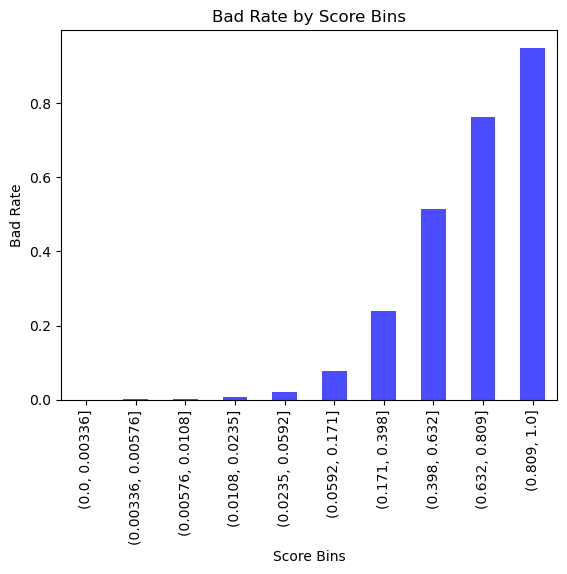

In [55]:
import matplotlib.pyplot as plt

ax = stat.plot(kind='bar', y='Bad Rate', color='blue', alpha=0.7, legend=False)
ax.set_xlabel("Score Bins")
ax.set_ylabel("Bad Rate")
ax.set_title("Bad Rate by Score Bins")

# display the chart
plt.show()

In [56]:
#Get summary stats

def get_summary_statistics(df, column_names):
    summary_stats = pd.DataFrame(columns=["Feature", "Minimum value", "Maximum value", "1 percentile", "5 percentile", "99 percentile", "95 percentile", "Median value", "Mean value", "Missing Value"])
    for column_name in column_names:
        summary_stats = summary_stats.append({
            "Feature": column_name,
            "Minimum value": df[column_name].min(),
            "Maximum value": df[column_name].max(),
            "1 percentile": df[column_name].quantile(0.01),
            "5 percentile": df[column_name].quantile(0.05),
            "99 percentile": df[column_name].quantile(0.99),
            "95 percentile": df[column_name].quantile(0.95),
            "Median value": df[column_name].median(),
            "Mean value": df[column_name].mean(),
            "Missing Value": df[column_name].isnull().sum() / len(df[column_name]) * 100
        }, ignore_index=True)
    return summary_stats

column_name_input = ['P_2','D_45','S_3','B_9','D_42','D_50']
get_summary_statistics(final_data,column_name_input)

C:\Users\parth\AppData\Local\Temp\ipykernel_30004\313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
C:\Users\parth\AppData\Local\Temp\ipykernel_30004\313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
C:\Users\parth\AppData\Local\Temp\ipykernel_30004\313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
C:\Users\parth\AppData\Local\Temp\ipykernel_30004\313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
C:\Users\parth\AppData\Local\Temp\ipyker

,Feature,Minimum value,Maximum value,1 percentile,5 percentile,99 percentile,95 percentile,Median value,Mean value,Missing Value
0,P_2,-3.558910e-01,1.009994,0.010377,0.218859,1.005579,0.974548,0.680059,0.648390,1.195541
1,D_45,1.908604e-06,1.580646,0.002662,0.008265,0.992696,0.755164,0.153748,0.237492,0.068695
2,S_3,-3.057465e-01,3.379019,0.006208,0.063091,1.015163,0.618759,0.166040,0.231109,18.248870
3,B_9,1.537601e-07,16.337705,0.000239,0.001175,0.983008,0.650929,0.028409,0.192829,0.000000
4,D_42,-2.559827e-04,4.189226,0.002694,0.007013,1.077812,0.585220,0.117499,0.185985,81.238927
5,D_50,-1.603947e+00,46.147524,0.002726,0.025922,1.014137,0.448881,0.108473,0.173337,57.612534


In [57]:
print(X_test1_selected['D_45'])

9        0.075384
10       0.011603
17       0.054218
34       0.057162
35       0.004674
           ...   
82942    0.164878
82943    0.009772
82944    0.065992
82947    0.087645
82971    0.095395
Name: D_45, Length: 16038, dtype: float64


In [58]:
print(X_test_selected['D_45'])

12       0.038232
39       0.322905
52       0.038526
54       0.123623
61       0.059196
           ...   
82957    0.080529
82961    0.004656
82965    0.359686
82966    0.308071
82974    0.561051
Name: D_45, Length: 11111, dtype: float64


In [59]:
X_train_normalized = sc.transform(X_train_selected)
X_test_normalized = sc.transform(X_test_selected)
X_test1_normalized = sc.transform(X_test1_selected)

In [60]:
#convert to pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train_selected.columns)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test_selected.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized,columns=X_test1_selected.columns)

In [61]:
#Outlier Treatment
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()




,count,mean,std,min,1%,50%,99%,max
B_11,55826.0,-2.660112e-17,1.000009,-0.532956,-0.531428,-0.434838,4.353052,6.623334
R_26,6435.0,9.937661e-18,1.000078,-0.331138,-0.330432,-0.186771,3.306861,22.601578
D_49,5454.0,7.816752e-18,1.000092,-0.872858,-0.858330,-0.270438,3.497066,32.812245
B_9,55826.0,-4.123811e-17,1.000009,-0.645931,-0.645131,-0.551619,2.739362,54.323911
P_2,55179.0,-2.778867e-16,1.000009,-3.924600,-2.584323,0.133533,1.458064,1.475765
D_110,312.0,-3.985416e-17,1.001606,-2.514402,-2.279392,0.405253,0.890362,0.890873
D_48,48432.0,1.599132e-16,1.000010,-1.208966,-1.175378,-0.271703,1.890956,26.238041
D_43,38334.0,5.560673e-17,1.000013,-0.692987,-0.680945,-0.302693,3.916392,31.597239
D_75,55826.0,-3.881982e-17,1.000009,-0.765706,-0.764397,-0.431731,3.731336,10.601733
D_56,25154.0,1.299394e-17,1.000020,-1.069606,-0.970446,-0.261640,3.895420,20.792436


In [62]:
X_test_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_11,11111.0,-0.064915,0.916431,-0.532940,-0.531502,-0.457077,3.900623,6.369532
R_26,1019.0,0.009134,1.093030,-0.331090,-0.330263,-0.188001,3.294335,25.117755
D_49,989.0,0.055363,1.901818,-0.866104,-0.849219,-0.308957,4.378319,49.344205
B_9,11111.0,-0.076743,0.938358,-0.645929,-0.645121,-0.584148,2.458276,22.672212
P_2,10962.0,0.082564,0.956063,-3.887774,-2.447798,0.231603,1.458504,1.475715
D_110,36.0,-0.049389,1.022287,-2.173892,-2.151003,0.265817,0.886587,0.886762
D_48,9536.0,-0.076172,0.961371,-1.209173,-1.176668,-0.372417,1.847588,3.080063
D_43,7760.0,-0.075144,0.779066,-0.692489,-0.683456,-0.323928,2.847186,14.811971
D_75,11111.0,-0.044932,0.946634,-0.765696,-0.764603,-0.436325,3.428330,8.208111
D_56,4667.0,0.019244,0.995334,-1.058151,-0.970933,-0.243087,3.707319,19.143162


In [63]:
X_test1_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_11,16038.0,0.121503,1.176472,-0.532954,-0.531206,-0.411362,5.425988,7.940977
R_26,1620.0,0.020764,0.971976,-0.331143,-0.330359,-0.187221,4.126059,14.565508
D_49,1877.0,0.011307,1.110656,-0.872777,-0.859872,-0.266965,3.265411,25.355732
B_9,16038.0,0.067975,0.969425,-0.645928,-0.645106,-0.507611,2.577903,23.263273
P_2,15842.0,-0.148636,1.077307,-4.165423,-2.916614,-0.046049,1.453646,1.475670
D_110,113.0,0.073871,0.978221,-2.256773,-2.230965,0.620538,0.890521,0.890598
D_48,13971.0,0.109906,1.037369,-1.208526,-1.173922,-0.116241,1.991288,9.891990
D_43,10138.0,0.055121,1.006692,-0.692870,-0.682216,-0.264805,4.201075,19.717757
D_75,16038.0,0.041762,1.043294,-0.765690,-0.764264,-0.428254,3.751527,13.285983
D_56,6593.0,0.023935,1.039534,-1.061037,-0.961045,-0.250147,3.916720,21.749474


In [64]:
# Get the 1st and 99th percentile values for each column
p1 = X_train_normalized.quantile(0.01)
p99 = X_train_normalized.quantile(0.99)

# Replace values outside the percentile range with the percentile value for each column
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

# Apply the same operation to the test data
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

#Apply to test2 data
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

In [65]:
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_11,55826.0,-8.676915e-03,0.955572,-0.531428,-0.531428,-0.434838,4.352780,4.353052
R_26,6435.0,-4.277126e-02,0.550416,-0.330432,-0.330430,-0.186771,3.305639,3.306861
D_49,5454.0,-1.906092e-02,0.816735,-0.858330,-0.858192,-0.270438,3.482042,3.497066
B_9,55826.0,-1.797829e-02,0.853091,-0.645131,-0.645131,-0.551619,2.738655,2.739362
P_2,55179.0,3.316911e-03,0.990092,-2.584323,-2.584113,0.133533,1.458052,1.458064
D_110,312.0,1.669480e-03,0.997620,-2.279392,-2.278458,0.405253,0.890299,0.890362
D_48,48432.0,-3.601424e-03,0.984628,-1.175378,-1.175373,-0.271703,1.890854,1.890956
D_43,38334.0,-2.263545e-02,0.805052,-0.680945,-0.680935,-0.302693,3.916065,3.916392
D_75,55826.0,-1.142219e-02,0.942196,-0.764397,-0.764397,-0.431731,3.731327,3.731336
D_56,25154.0,-2.083145e-02,0.849168,-0.970446,-0.970443,-0.261640,3.894035,3.895420


In [66]:
#Missing Value Imputation
X_train_normalized.fillna(0,inplace=True)
X_test_normalized.fillna(0,inplace=True)
X_test1_normalized.fillna(0,inplace=True)

In [67]:
X_train_normalized.isna().sum()

B_11         0
R_26         0
D_49         0
B_9          0
P_2          0
D_110        0
D_48         0
D_43         0
D_75         0
D_56         0
R_1          0
D_112        0
D_66_1.0     0
D_79         0
B_4          0
D_45         0
D_50         0
D_46         0
B_6          0
D_42         0
B_2          0
R_3          0
R_27         0
B_7          0
B_3          0
D_111        0
B_5          0
D_132        0
P_3          0
D_51         0
B_1          0
B_8          0
D_41         0
D_134        0
D_114_1.0    0
S_3          0
D_52         0
D_44         0
dtype: int64

In [68]:
#Neural Network-Grid search


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the neural network model
def create_model(hidden_layers=2, nodes_per_layer=4, activation='relu', dropout_rate=0.5):
    model = Sequential()
    for i in range(hidden_layers):
        if i == 0:
            model.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
        else:
            model.add(Dense(nodes_per_layer, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with default parameters
nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the hyperparameters for the grid search
params = {
    'hidden_layers': [2, 4],
    'nodes_per_layer': [4, 6],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0,0.5],
    'batch_size': [100, 10000]
}

# Perform grid search
grid_search = GridSearchCV(nn_model, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train_normalized, y_train)

# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

C:\Users\parth\AppData\Local\Temp\ipykernel_30004\1480584889.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)


349/349 [==============================] - 1s 2ms/step
Best AUC: 0.9267175746730523
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}


In [69]:
results_nn = grid_search.cv_results_
for i in range(len(results_nn['params'])):
    print("Parameters",results_nn['params'][i])
    print("AUC Score",results_nn['mean_test_score'][i])

Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9261707261454877
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9261510718686099
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.9258760996700259
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}
AUC Score 0.9267175746730523
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9248112705321235
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9231302372220809
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.8975249621

In [70]:
results_nn = pd.DataFrame({
    'params': results_nn['params'],
    'auc_score': results_nn['mean_test_score']
})

# Write the dataframe to a CSV file
results_nn.to_csv('grid_search_results_nn.csv', index=False)

results_nn

,params,auc_score
0,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.926171
1,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.926151
2,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.925876
3,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.926718
4,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924811
5,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.923130
6,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.897525
7,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.914198
8,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.845013
9,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.886277


In [71]:
# Define the hyperparameters for the grid search

# Create empty lists to store results
results_train = []
results_test_1 = []
results_test_2 = []
h= []
nodes=[]
act=[]
drop=[]
batch=[]
scores_nn = pd.DataFrame()

# Nested for loop to iterate through hyperparameters
for hidden_layers in [2,4]:
    for nodes_per_layer in [4,6]:
        for activation in ['relu','tanh']:
            for dropout_rate in [0,0.5]:
                for batch_size in [100,10000]:
                    # Create the model with the current hyperparameters
                    model_nn_test = Sequential()
                    for i in range(hidden_layers):
                        if i == 0:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
                        else:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation))
                        if dropout_rate > 0:
                            model_nn_test.add(Dropout(dropout_rate))
                    model_nn_test.add(Dense(1, activation='sigmoid'))
                    model_nn_test.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                    
                    # Train the model on the training data
                    model_nn_test.fit(X_train_normalized, y_train, epochs=20, batch_size=batch_size, verbose=0)
                    
                    #creating lists
                    h.append(hidden_layers)
                    nodes.append(nodes_per_layer)
                    act.append(activation)
                    drop.append(dropout_rate)
                    batch.append(batch_size)
                    # Calculate AUC scores for the training data and the two test datasets
                    y_train_pred = model_nn_test.predict(X_train_normalized)
                    auc_train = roc_auc_score(y_train, y_train_pred)
                    
                    y_test_1_pred = model_nn_test.predict(X_test_normalized)
                    auc_test_1 = roc_auc_score(y_test, y_test_1_pred)
                    
                    y_test_2_pred = model_nn_test.predict(X_test1_normalized)
                    auc_test_2 = roc_auc_score(y_test1, y_test_2_pred)
                    
                    # Store the results in the lists
                    results_train.append(auc_train)
                    results_test_1.append(auc_test_1)
                    results_test_2.append(auc_test_2)

scores_nn['hidden_layers'] = h
scores_nn['nodes_per_layer'] = nodes
scores_nn['activation'] = act
scores_nn['dropout_rate'] = drop
scores_nn['batch_size'] = batch
scores_nn['AUC Train'] = results_train
scores_nn['AUC Test 1'] = results_test_1
scores_nn['AUC Test 2'] = results_test_2
scores_nn.to_csv("Neural_Network_Scores.csv")

502/502 [==============================] - 1s 2ms/step


In [72]:
results_train

[0.9275643341060942,
 0.8893915414602903,
 0.9268073558970986,
 0.8713005051416868,
 0.9281029702331854,
 0.892825104058681,
 0.9256755643832901,
 0.8868904510289668,
 0.9292988645062661,
 0.8873303190685548,
 0.9238525992332345,
 0.8215427778747506,
 0.9287934066126331,
 0.8986815776728513,
 0.9255332436262074,
 0.9036628083644711,
 0.9280443570595236,
 0.8868841436670434,
 0.8789422381272864,
 0.8172132620638342,
 0.9277850473199343,
 0.9029703438997665,
 0.9249862653419764,
 0.869506239327128,
 0.9290133741822247,
 0.8814341635926874,
 0.9264772703435216,
 0.8759135830020354,
 0.9288091523713287,
 0.9103670149060157,
 0.9254106442788197,
 0.897897289928719]

In [73]:
results_test_1

[0.9114166672714357,
 0.8764916178573313,
 0.9118511153776441,
 0.8595283635301197,
 0.9109318665490818,
 0.8755771175850956,
 0.9117517764752399,
 0.8756561631288579,
 0.9136903297979883,
 0.8801282280439524,
 0.9091286694804999,
 0.7885156075638948,
 0.9122343821102351,
 0.8847704346281929,
 0.9119950727904408,
 0.8883830556458229,
 0.911477345757707,
 0.8713847919151259,
 0.8766919979747855,
 0.8057394053212681,
 0.9116119628498038,
 0.8871977756687022,
 0.9113027019195905,
 0.8613809500642714,
 0.9118357049684324,
 0.8475363773012915,
 0.911250960574708,
 0.8613734240504701,
 0.9125379761312472,
 0.8945159057373939,
 0.9111183817780152,
 0.8858756387144241]

In [74]:
results_test_2

[0.9376379069624325,
 0.8972614350706318,
 0.9394633150238008,
 0.8795076260077619,
 0.9386709160364586,
 0.9012855672448633,
 0.9386998199412728,
 0.901071142144383,
 0.9401495719758957,
 0.8929665573389809,
 0.9328832098836919,
 0.8601092406551051,
 0.9393168344678392,
 0.9118389977281589,
 0.9382354722210264,
 0.9196943893797636,
 0.938863030846596,
 0.8942855360199305,
 0.8744168819570212,
 0.8126865253955713,
 0.9387050967275664,
 0.9134919770869624,
 0.9373681277105819,
 0.8700397829897479,
 0.9391564277433833,
 0.8998183459213266,
 0.9390435026219848,
 0.881223026811607,
 0.9387364353434713,
 0.925996037465069,
 0.9382107272195924,
 0.9015634179902905]

In [75]:
# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best AUC: 0.9267175746730523
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}


In [76]:
#Best Neural Network
# Define the neural network model with the best parameters
model_best_nn = Sequential()
model_best_nn.add(Dense(6, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(6, activation='relu'))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_best_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model_best_nn.fit(X_train_normalized, y_train, batch_size=100, epochs=20, verbose=0)

In [77]:
# Evaluate the model
y_pred_nn = model_best_nn.predict(X_test_normalized)



# Evaluate the model on the test data
loss, accuracy = model_best_nn.evaluate(X_test_normalized, y_test)
print(f"Test loss: {loss:.3f}")
print(f"Test accuracy: {accuracy:.3f}")


348/348 [==============================] - 1s 1ms/step - loss: 0.3130 - accuracy: 0.8552
Test loss: 0.313
Test accuracy: 0.855


In [78]:
###Strategy#####
Default_rate_train = sum(y_train['target'])/(len(y_train['target']))
Default_rate_test= sum(y_test['target'])/(len(y_test['target']))
Default_rate_test1=sum(y_test1['target'])/(len(y_test1['target']))





print("Default rate for train data is : ",Default_rate_train)
print("Default rate for train data is : ",Default_rate_test)
print("Default rate for train data is : ",Default_rate_test1)

Default rate for train data is :  0.25767563500877727
Default rate for train data is :  0.23697236972369723
Default rate for train data is :  0.2883152512782142


In [79]:
y_test1.columns

Index(['target'], dtype='object')

In [80]:
Data_test1 = pd.DataFrame(y_test1[['target']])

Data_test1.to_csv("Probability_of_default.csv")



In [81]:
len(y_test1)

16038

In [82]:
# Data_test1=Data_test1.sort_values(1)

In [83]:
df_xgb = pd.DataFrame(xgb_best_model.predict_proba(X_test1_selected))

In [84]:
len(Data_test1)

16038

In [85]:
Data_test1.shape

(16038, 1)

In [86]:
df_xgb.shape

(16038, 2)

In [87]:
Data_test1 = Data_test1.reset_index(drop=True)
df_xgb = df_xgb.reset_index(drop=True)

In [88]:
df_new = pd.concat([Data_test1, df_xgb],axis=1)

In [89]:
len(df_new)
df_new.shape

(16038, 3)

In [90]:
default_testing_rate=df_new

In [91]:
from sklearn.metrics import roc_curve



fpr,tpr,threshold= roc_curve(nm.array(y_test1),xgb_best_model.predict(X_test1_selected))

In [92]:
youden_index = tpr-fpr
type(youden_index)

numpy.ndarray

In [93]:
nm.argmax(youden_index)

1

In [94]:
print(fpr,tpr,threshold)

[0.         0.10443315 1.        ] [0.         0.81725779 1.        ] [2 1 0]


In [95]:
threshold[nm.argmax(youden_index)]

1

In [96]:
y_test1['target']

9        1
10       1
17       1
34       1
35       0
        ..
82942    0
82943    0
82944    0
82947    1
82971    1
Name: target, Length: 16038, dtype: int64

In [97]:
import os
os.getcwd()

"C:\\Users\\parth\\The University of Texas at Dallas\\Saxena, Sakshi - Parth's\\Final-Code"

In [106]:
#Strategy

#def revenue(TH,x,y,TR):
def revenue(TH,x,y):
    df = pd.DataFrame(y)
    df['Prob of 1'] = xgb_best_model.predict_proba(x)[:, 1]
    df['Accepted_customers'] = (df['Prob of 1'] < TH).astype(int)
    df = df[df['Accepted_customers'] == 1]
    balance_feature = x['B_9']
    spend_feature = x['S_3']
    df['B9_Balance'] = balance_feature
    df['S3_Spend'] = spend_feature
    df = df.dropna()
    length = len(df['target'])
    RR = nm.mean(df['target'])
    df = df.drop(df[df['target'] == 1].index)
    df = df.reset_index(drop=True)
    
    return(length,RR,(sum(df['B9_Balance'])*0.02) + (sum(df['S3_Spend'])*0.001))


a,b,c = revenue(0.56,X_test1_selected,y_test1)
print("#Accepted: ",a)
print("Default Rate: ",b)
print("Revenue: ",c)

#Accepted:  8859
Default Rate:  0.09967264928321481
Revenue:  18.858450363965247


In [184]:
input_x = pd.concat([X_train_selected,X_test_selected,X_test1_selected])
input_y= pd.concat([y_train,y_test,y_test1])
a,b,c = revenue(0.3,input_x,input_y)
print("#Accepted: ",a)
print("Default Rate: ",b)
print("Revenue: ",c)

#Accepted:  41500
Default Rate:  0.042433734939759035
Revenue:  73.73352704459457
